In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as op
import pandas as pd 


- look at one subject's tract profiles - done
- will need to unzip and copy over tract profiles for all subjects (from babs_qsirecon_pyafq to HCPD_qsirecon_pyafq) - running
- may need to take the average at each node across subjects
- then plot for each tract

Helpful tutorials:
- https://yeatmanlab.github.io/AFQ/tutorials/AFQ_example#5 
- https://yeatmanlab.github.io/pyAFQ/tutorials/tutorial_examples/plot_001_afq_api.html

In [3]:
sub_2996590 = pd.read_csv("/cbica/projects/luo_wm_dev/input/HCPD/qsirecon_pyafq/qsirecon/sub-2996590/ses-V1/dwi/sub-2996590_ses-V1_space-T1w_desc-preproc/sub-2996590_ses-V1_space-T1w_desc-preproc_dwi_space-RASMM_model-probCSD_algo-AFQ_desc-profiles_dwi.csv")
sub_2996590

,Unnamed: 0,tractID,nodeID,dti_fa,dti_md
0,0,ATR_L,0,0.244171,0.000657
1,1,ATR_L,1,0.273678,0.000632
2,2,ATR_L,2,0.307791,0.000619
3,3,ATR_L,3,0.342530,0.000610
4,4,ATR_L,4,0.375426,0.000602
...,...,...,...,...,...
2195,2195,VOF_R,95,0.343834,0.000581
2196,2196,VOF_R,96,0.321752,0.000586
2197,2197,VOF_R,97,0.299173,0.000593
2198,2198,VOF_R,98,0.277023,0.000601


### Tracts in the AFQ code
I think AFQ used the Mori white matter atlas to segment 20 tracts: https://github.com/yeatmanlab/AFQ/blob/master/functions/AFQ_SegmentFiberGroups.m
but it's not clear to me what tracks the abbreviations correspond to... I'm seeing this in the code:

labels = {'Left Thalamic Radiation',  
          'Right Thalamic Radiation',   
          'Left Corticospinal',   
          'Right Corticospinal',  
          'Left Cingulum Cingulate',  
          'Right Cingulum Cingulate',  
          'Left Cingulum Hippocampus',  
          'Right Cingulum Hippocampus',  
          'Callosum Forceps Major',  
          'Callosum Forceps Minor',  
          'Left IFOF','Right IFOF',  
          'Left ILF','Right ILF',  
          'Left SLF','Right SLF',  
          'Left Uncinate',  
          'Right Uncinate',  
          'Left Arcuate',  'Right Arcuate'};`


The Mori atlas: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2724595/

### What tracts are included in the tract profiles csv?

ATR = anterior thalamic radiation  
CGC = cingulum in the cingulated cortex area   
CST = corticospinal  
IFO = inferior fronto-occipital fasciculus   
ILF =  inferior longitudinal fasciulus  
SLF = superior longitudinal fasciculus  
ARC =  arcuate???  
UNC = uncinate fasciculus  
FA =   ??  
FP =   ??  
pARC =   ??   
pARC =  ??  
VOF =  vertical occipital fasciculus??

In [4]:
sub_2996590['tractID'].unique()

array(['ATR_L', 'ATR_R', 'CGC_L', 'CGC_R', 'CST_L', 'CST_R', 'IFO_L',
       'IFO_R', 'ILF_L', 'ILF_R', 'SLF_L', 'SLF_R', 'ARC_L', 'ARC_R',
       'UNC_L', 'UNC_R', 'FA', 'FP', 'pARC_L', 'pARC_R', 'VOF_L', 'VOF_R'],
      dtype=object)

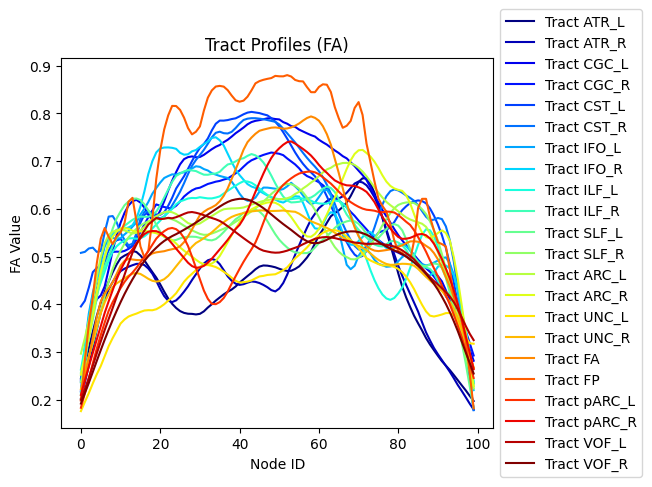

In [6]:


# Loop through each unique tractID
unique_tract_ids = sub_2996590['tractID'].unique()

# Set colors
plt.gca().set_prop_cycle('color', plt.cm.jet(np.linspace(0, 1, 22)))

for tract_id in unique_tract_ids:
    # Filter data for the current tractID
    tract_data = sub_2996590[sub_2996590['tractID'] == tract_id]
    
    # Plotting
    plt.plot(tract_data['nodeID'], tract_data['dti_fa'], label=f'Tract {tract_id}')

# Adding labels and legend
plt.xlabel('Node ID')
plt.ylabel('FA Value')
plt.title('Tract Profiles (FA)')

# Adjusting subplot size
plt.subplots_adjust(right=0.8)  # Adjusts the width of the plot area

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

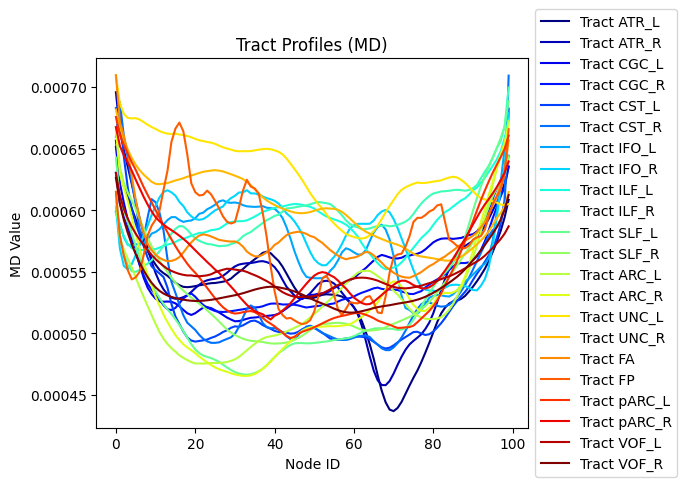

In [7]:


# Loop through each unique tractID
unique_tract_ids = sub_2996590['tractID'].unique()

# Set colors
plt.gca().set_prop_cycle('color', plt.cm.jet(np.linspace(0, 1, 22)))

for tract_id in unique_tract_ids:
    # Filter data for the current tractID
    tract_data = sub_2996590[sub_2996590['tractID'] == tract_id]
    
    # Plotting
    plt.plot(tract_data['nodeID'], tract_data['dti_md'], label=f'Tract {tract_id}')

# Adding labels and legend
plt.xlabel('Node ID')
plt.ylabel('MD Value')
plt.title('Tract Profiles (MD)')

# Adjusting subplot size
plt.subplots_adjust(right=0.8)  # Adjusts the width of the plot area

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory containing all subject CSV files
directory = "/cbica/projects/luo_wm_dev/input/HCPD/HCPD_tractprofiles/"
 
# Initialize a DataFrame to store the aggregated FA values for each node and tract
all_values = pd.DataFrame(columns=['tractID', 'nodeID'])

# Iterate through each subject's directory
for sub in os.listdir(directory):
    sub_dir = os.path.join(directory, sub)
    if os.path.isdir(sub_dir):
        # Iterate through each subject's CSV files
        for filename in os.listdir(sub_dir):
            if filename.endswith(".csv"):
                filepath = os.path.join(sub_dir, filename)
                # Read the CSV file
                df = pd.read_csv(filepath)
                # Append the data to the subject_fa_values DataFrame
                all_values = pd.concat([all_values, df], ignore_index=True)
        
        

In [27]:
average_fa_values = all_values.groupby(['tractID', 'nodeID'])['dti_fa'].mean().reset_index()
average_md_values = all_values.groupby(['tractID', 'nodeID'])['dti_md'].mean().reset_index()



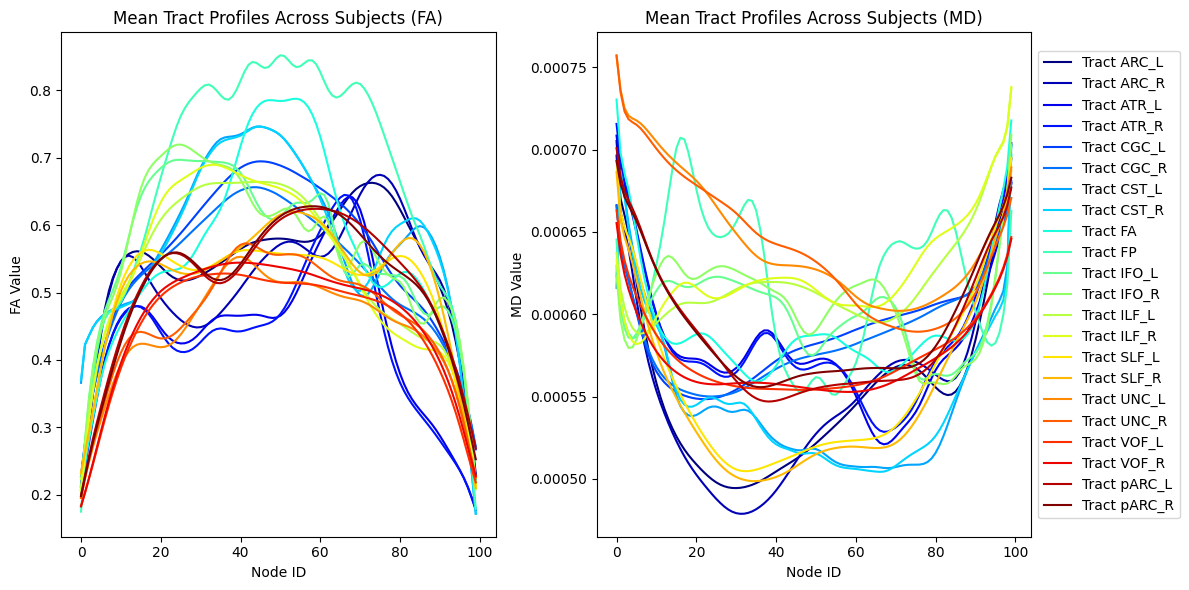

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for FA values
axs[0].set_prop_cycle('color', plt.cm.jet(np.linspace(0, 1, 22)))
unique_tract_ids_fa = average_fa_values['tractID'].unique()
for tract_id in unique_tract_ids_fa:
    tract_data = average_fa_values[average_fa_values['tractID'] == tract_id]
    axs[0].plot(tract_data['nodeID'], tract_data['dti_fa'], label=f'Tract {tract_id}')
axs[0].set_xlabel('Node ID')
axs[0].set_ylabel('FA Value')
axs[0].set_title('Mean Tract Profiles Across Subjects (FA)')
#axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot for MD values
axs[1].set_prop_cycle('color', plt.cm.jet(np.linspace(0, 1, 22)))
unique_tract_ids_md = average_md_values['tractID'].unique()
for tract_id in unique_tract_ids_md:
    tract_data = average_md_values[average_md_values['tractID'] == tract_id]
    axs[1].plot(tract_data['nodeID'], tract_data['dti_md'], label=f'Tract {tract_id}')
axs[1].set_xlabel('Node ID')
axs[1].set_ylabel('MD Value')
axs[1].set_title('Mean Tract Profiles Across Subjects (MD)')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()